In [1]:
import requests
import json
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
import gdal
import rasterio 
from rasterio.plot import show
from rasterio.mask import mask

In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Getting the data from first api

url = ("https://loc.geopunt.be/v4/location?q=Kipdorpvest%2046.2000%20Antwerpen")
r = requests.get(url)
data = r.json()  # extracting data in json format
data

{'LocationResult': [{'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.21667596358092,
     'Lon_WGS84': 4.413419257819423,
     'X_Lambert72': 153120.57,
     'Y_Lambert72': 211859.33},
    'UpperRight': {'Lat_WGS84': 51.2198772508278,
     'Lon_WGS84': 4.415307103722314,
     'X_Lambert72': 153252.25,
     'Y_Lambert72': 212215.57}},
   'FormattedAddress': 'Kipdorpvest, Antwerpen',
   'Housenumber': None,
   'ID': 1533,
   'Location': {'Lat_WGS84': 51.218221675900615,
    'Lon_WGS84': 4.414405172451756,
    'X_Lambert72': 153189.35,
    'Y_Lambert72': 212031.34},
   'LocationType': 'crab_straat',
   'Municipality': 'Antwerpen',
   'Thoroughfarename': 'Kipdorpvest',
   'Zipcode': '2000'}]}

In [5]:
# Getting info of an address in json format

params = {"straatnaam" : "Kipdorpvest", "Huisnummer" : 46, "postcode" : 2000}
add_url = ("https://api.basisregisters.vlaanderen.be/v1/adresmatch")
req_url = requests.get(add_url, params)
add_info = req_url.json()
add_info

{'adresMatches': [{'adresPositie': {'point': {'coordinates': [153140.69,
      211933.37],
     'type': 'Point'}},
   'adresStatus': 'inGebruik',
   'adresseerbareObjecten': [{'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272156',
     'objectId': '16272156',
     'objectType': 'gebouweenheid'},
    {'detail': 'https://api.basisregisters.vlaanderen.be/v1/percelen/11803C0256-00B002',
     'objectId': '11803C0256-00B002',
     'objectType': 'perceel'}],
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1891841',
   'gemeente': {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/11002',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Antwerpen',
      'taal': 'nl'}},
    'objectId': '11002'},
   'huisnummer': '46',
   'identificator': {'id': 'https://data.vlaanderen.be/id/adres/1891841',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '1891841',
    'versieId': '2020-06-26T08:35:07+02:00'},
   'offici

In [6]:
# Get the url of the building unit id

build_unit = add_info["adresMatches"][0]["adresseerbareObjecten"][0]['detail']
build_unit

'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272156'

In [7]:
# Request the info for this building unit id

build_unit = "https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272156"
req_info1 = requests.get(build_unit,params)
build_unit_info = req_info1.json()
build_unit_info

{'adressen': [{'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1891841',
   'objectId': '1891841'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/804247',
   'objectId': '804247'}],
 'functie': 'gemeenschappelijkDeel',
 'gebouw': {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouwen/16270942',
  'objectId': '16270942'},
 'gebouweenheidStatus': 'gerealiseerd',
 'geometriePunt': {'point': {'coordinates': [153131.32, 211933.83],
   'type': 'Point'}},
 'identificator': {'id': 'https://data.vlaanderen.be/id/gebouweenheid/16272156',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouweenheid',
  'objectId': '16272156',
  'versieId': '2018-10-22T16:01:04+02:00'},
 'positieGeometrieMethode': 'afgeleidVanObject'}

In [8]:
# Get the url of building ID

build_id = build_unit_info['gebouw']['detail']
build_id

'https://api.basisregisters.vlaanderen.be/v1/gebouwen/16270942'

In [9]:
# Get the info for the building id

build_id = "https://api.basisregisters.vlaanderen.be/v1/gebouwen/16270942"
add_req2 = requests.get(build_id,params)
build_id_info = add_req2.json()
build_id_info

{'gebouwStatus': 'gerealiseerd',
 'gebouweenheden': [{'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272156',
   'objectId': '16272156'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272185',
   'objectId': '16272185'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272186',
   'objectId': '16272186'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272188',
   'objectId': '16272188'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272190',
   'objectId': '16272190'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272192',
   'objectId': '16272192'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272193',
   'objectId': '16272193'},
  {'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/16272194',
   'objectId': '16272194'},
  {'detail': 'https://api.basisregisters.vlaanderen.b

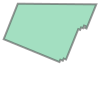

In [10]:
# Get the geometry of the house as a Polygon object

polygon = Polygon(build_id_info['geometriePolygoon']['polygon']['coordinates'][0])
polygon

In [11]:
coords = build_id_info['geometriePolygoon']['polygon']['coordinates'][0]
coords

[[153146.80404543132, 211941.30997310206],
 [153121.41806141287, 211941.515541099],
 [153116.85850940645, 211930.0332370922],
 [153134.88500542194, 211922.66101308912],
 [153135.18599741906, 211923.39598908648],
 [153135.97498942167, 211923.07298108935],
 [153136.26497342438, 211923.78299708664],
 [153137.01998142153, 211923.47899708897],
 [153140.97300542146, 211933.29301309586],
 [153141.5680134222, 211933.05301309377],
 [153141.8839814216, 211933.8350290954],
 [153142.51502142847, 211933.5799890943],
 [153142.86298942566, 211934.44200509414],
 [153143.4199814275, 211934.21800509468],
 [153143.2009734288, 211933.67701309547],
 [153143.64001342654, 211933.4999250956],
 [153146.80404543132, 211941.30997310206]]

Text(0.5, 1.0, 'Polygon')

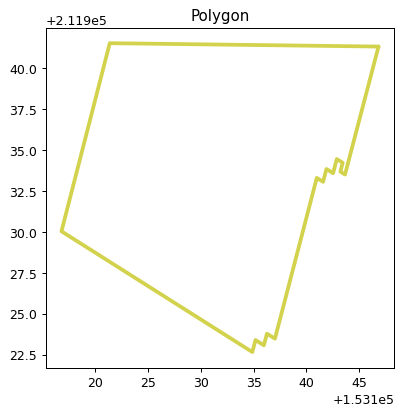

In [12]:
# Plot the polygon based on the given address

x,y = polygon.exterior.xy
fig = plt.figure(1,figsize=(5,5),dpi=90)
ax = fig.add_subplot(111)
ax.plot(x,y,color='y',alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')

In [13]:
# Get the bounding box from DSM tiff file

DSM_tiff15 = "/content/drive/MyDrive/3D_HOUSES/DSM_TIF/DHMVIIDSMRAS1m_k15.tif"
BB = rasterio.open(DSM_tiff15)
bound_box = BB.bounds
print(bound_box)

BoundingBox(left=130000.0, bottom=198000.0, right=162000.0, top=218000.0)


In [14]:
# Search coordinates(x,y) inside DSM tiff file

src = rasterio.open(DSM_tiff15)
bnd = src.bounds
for x,y in coords:
  if (bnd.left < x < bnd.right and bnd.top > y > bnd.bottom):
      print("inside")
  else:
      print("outside")

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [15]:
# Get the bounding box from DTM tiff file

DTM_tiff15 = "/content/drive/MyDrive/3D_HOUSES/DSM_TIF/DHMVIIDTMRAS1m_k15.tif"
BB = rasterio.open(DTM_tiff15)
bound_box = BB.bounds
print(bound_box)

BoundingBox(left=130000.0, bottom=198000.0, right=162000.0, top=218000.0)


In [16]:
# Search coordinates(x,y) inside DTM tiff file

src = rasterio.open(DTM_tiff15)
bnd = src.bounds
for x,y in coords:
  if (bnd.left < x < bnd.right and bnd.top > y > bnd.bottom):
      print("inside")
  else:
      print("outside")

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [20]:
# Clip the DSM.tiff file

with rasterio.open("/content/drive/MyDrive/3D_HOUSES/DSM_TIF/DHMVIIDSMRAS1m_k15.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src,[coords], crop=True)
    clipped_DSM = out_image[0]


In [21]:
# Clip the DTM.tiff file

with rasterio.open("/content/drive/MyDrive/3D_HOUSES/DSM_TIF/DHMVIIDTMRAS1m_k15.tif") as src:
    out_image, out_transform = mask(src,[coords],crop=True)
    clipped_DTM = out_image[0]